In [2]:
from keras.datasets import imdb
(train_data, train_labels),(test_data, test_labels)=imdb.load_data(num_words=10000)

In [3]:
import numpy as np

In [4]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [5]:
train_labels[1]

0

In [6]:
max([max(sequence) for sequence in  train_data])

9999

In [7]:
word_index=imdb.get_word_index()
reverse_world_index=dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review= ''.join(
    [reverse_world_index.get(i-3, '?') for i in train_data[0]])


#### Enconding the integer sequences into a binary matrix

In [8]:
#Data

In [9]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results= np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i,sequence]=1.
    return results



In [10]:
x_train=vectorize_sequences(train_data)
x_test= vectorize_sequences(test_data)

In [11]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [12]:
#Labels

In [13]:
y_train=np.asanyarray(train_labels).astype('float32')

In [14]:
y_test=np.asarray(test_labels).astype('float32')

#### Build your network

In [15]:
### Listing   The Model definition

In [16]:
from keras import models
from keras import layers
from keras import optimizers


In [17]:
model= models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

#### Model compiling the model

In [18]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#### configure optimizers

In [19]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss='binary_crossentropy',
             metrics=['accuracy'])

#### using custom losses and metrics 

In [20]:
from keras import losses
from keras import metrics


In [21]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss=losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])

### Validating your aproach

#### setting aside a validation set

In [22]:
x_val=x_train[:10000]
partial_x_train=x_train[10000:]

In [23]:
y_val=y_train[:10000]
partial_y_train=y_train[10000:]

#### Training model

In [24]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

In [25]:
history=model.fit(partial_x_train,
                 partial_y_train, 
                 epochs=20,
                 batch_size=512,
                 validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 102us/step - loss: 0.5090 - acc: 0.7813 - val_loss: 0.3794 - val_acc: 0.8686
Epoch 2/20
15000/15000 [==============================] - 1s 82us/step - loss: 0.3006 - acc: 0.9049 - val_loss: 0.3003 - val_acc: 0.8893
Epoch 3/20
15000/15000 [==============================] - 1s 85us/step - loss: 0.2180 - acc: 0.9285 - val_loss: 0.3084 - val_acc: 0.8716
Epoch 4/20
15000/15000 [==============================] - 1s 88us/step - loss: 0.1751 - acc: 0.9435 - val_loss: 0.2837 - val_acc: 0.8837
Epoch 5/20
15000/15000 [==============================] - 1s 83us/step - loss: 0.1426 - acc: 0.9541 - val_loss: 0.2842 - val_acc: 0.8872
Epoch 6/20
15000/15000 [==============================] - 1s 84us/step - loss: 0.1149 - acc: 0.9652 - val_loss: 0.3150 - val_acc: 0.8776
Epoch 7/20
15000/15000 [==============================] - 1s 85us/step - loss: 0.0978 - acc: 0.9708 - val_loss: 0.3128 - val_ac

In [27]:
history_dict=history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

#### Plotting the training and validation loss

In [28]:
import matplotlib.pyplot as plt
history_dict= history.history
loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
epochs=range(1, len(val_loss_values) +1)

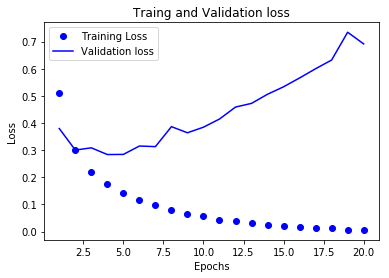

In [29]:
plt.plot(epochs, loss_values, 'bo',label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Traing and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Plotting the training and validation accuracy

In [28]:
plt.clf()
acc_values=history_dict['acc']
val_acc_values= history_dict['val_acc']

<Figure size 432x288 with 0 Axes>

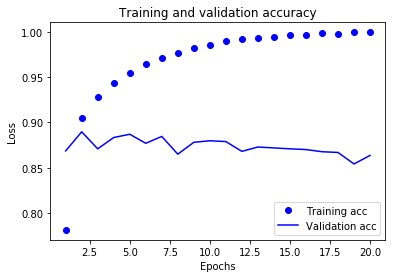

In [29]:
plt.plot(epochs, acc_values,'bo', label='Training acc')
plt.plot(epochs, val_acc_values,'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


#### Retraining a model from scratch

In [30]:
model=models.Sequential()
model.add(layers.Dense(16, activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [31]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [32]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
reults  =model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 61us/step - loss: 0.4749 - acc: 0.8217
Epoch 2/4
25000/25000 [==============================] - 1s 57us/step - loss: 0.2658 - acc: 0.9097
Epoch 3/4
25000/25000 [==============================] - 1s 58us/step - loss: 0.1983 - acc: 0.9297
Epoch 4/4
25000/25000 [==============================] - 1s 49us/step


In [33]:
reults

[0.32380225841522214, 0.87324]

##### Using a trained network to generate prediction on new data

In [50]:
y=model.predict(x_test)
y

array([[0.13887374],
       [0.99970275],
       [0.2972498 ],
       ...,
       [0.0716464 ],
       [0.04329092],
       [0.4764882 ]], dtype=float32)

In [56]:
x=np.arange(len(y))

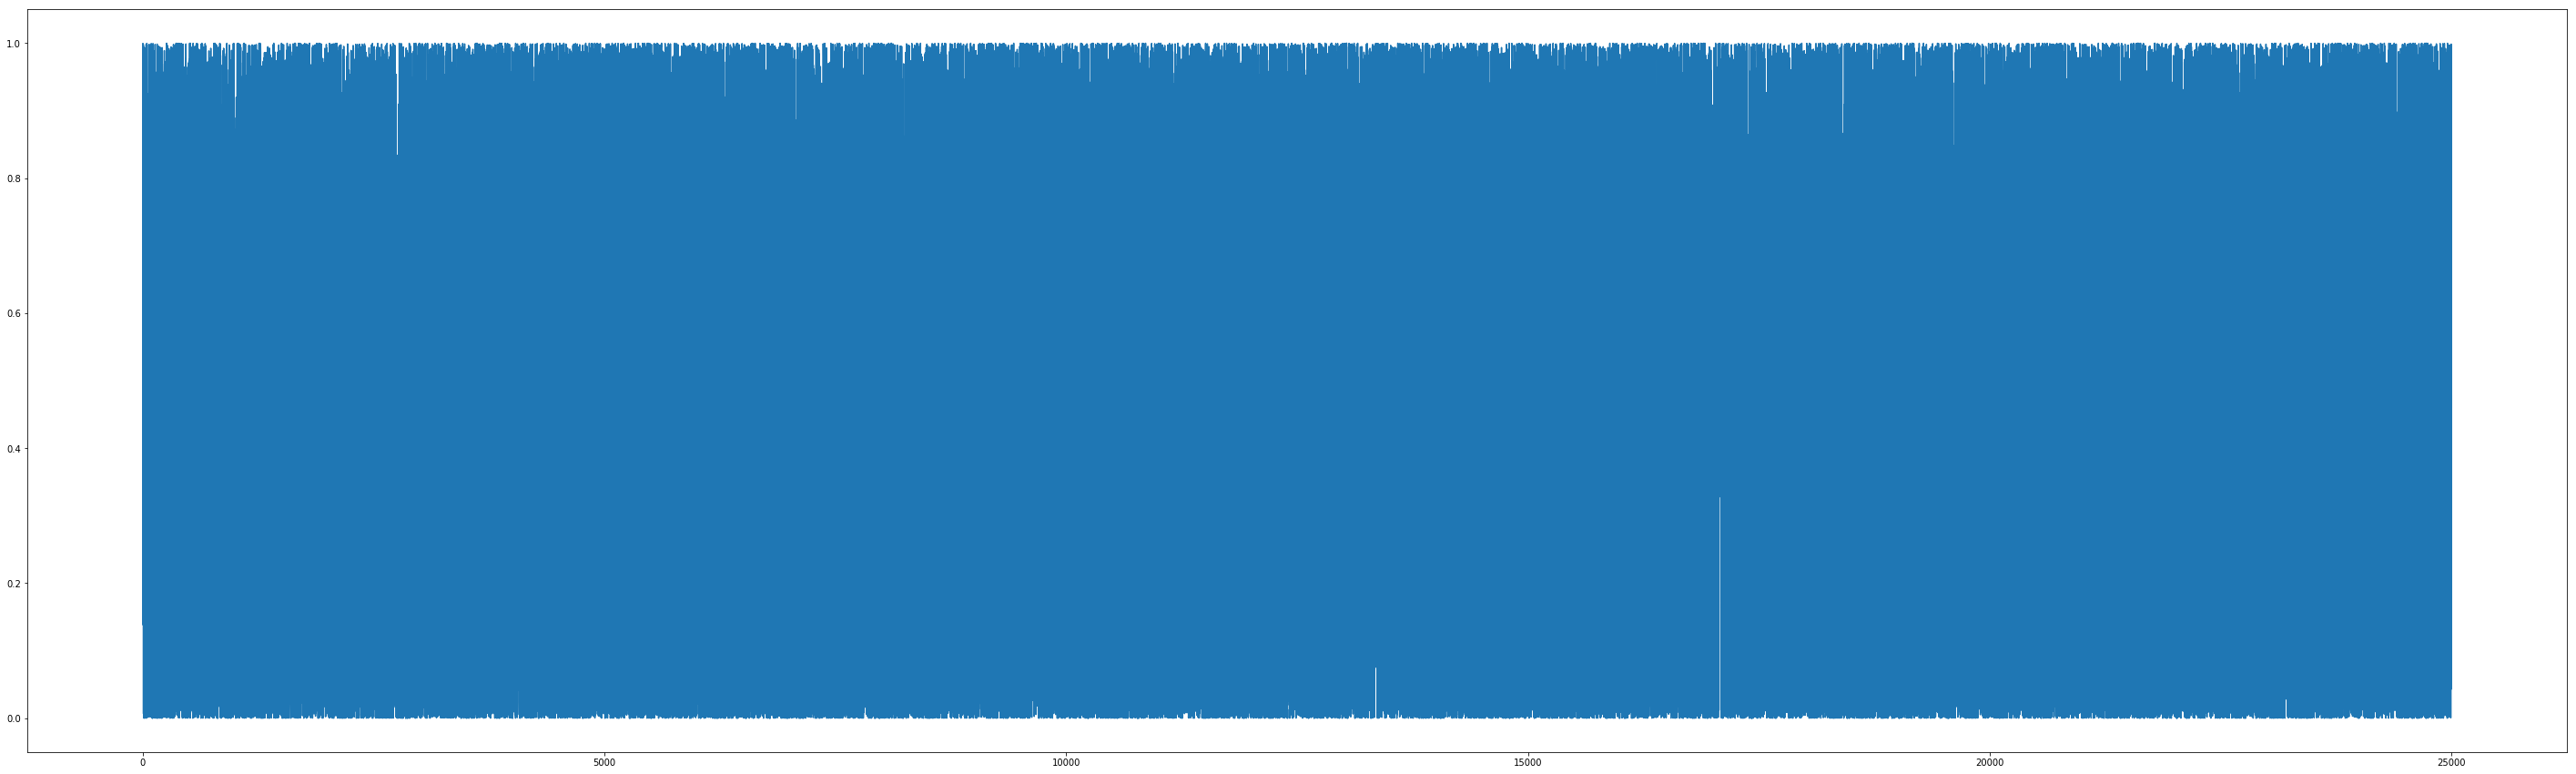

In [61]:
plt.figure(figsize=(50,15))
plt.plot(x,y)

#### Funtion

In [30]:
def MyFirstNN(h_a, h_b, h_c, f_a, f_b, f_c, n_epoch, batchsize):
    model=models.Sequential()
    model.add(layers.Dense(h_a, activation=f_a,input_shape=(10000,)))
    model.add(layers.Dense(h_b, activation=f_b))
    model.add(layers.Dense(h_c, activation=f_c))
    
    model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
    
    model.fit(x_train, y_train, epochs=n_epoch, batch_size=batchsize)
    reults  =model.evaluate(x_test, y_test)
    return reults
    
    

#### 4 Epochs

In [31]:
MyFirstNN(16,16,1,'relu','relu','sigmoid',4,512)

Epoch 1/4
25000/25000 [==============================] - 2s 62us/step - loss: 0.4749 - acc: 0.8217
Epoch 2/4
25000/25000 [==============================] - 1s 59us/step - loss: 0.2658 - acc: 0.9097
Epoch 3/4
25000/25000 [==============================] - 1s 59us/step - loss: 0.1982 - acc: 0.9299
Epoch 4/4
25000/25000 [==============================] - 1s 34us/step


[0.3231537017917633, 0.87348]

#### 8 Epochs

In [72]:
MyFirstNN(16,16,1,'relu','relu','sigmoid',8,512)

Epoch 1/8
25000/25000 [==============================] - 1s 57us/step - loss: 0.4300 - acc: 0.8249
Epoch 2/8
25000/25000 [==============================] - 1s 48us/step - loss: 0.2509 - acc: 0.9103
Epoch 3/8
25000/25000 [==============================] - 1s 49us/step - loss: 0.1938 - acc: 0.9309
Epoch 4/8
25000/25000 [==============================] - 1s 50us/step - loss: 0.1642 - acc: 0.9417
Epoch 5/8
25000/25000 [==============================] - 1s 49us/step - loss: 0.1411 - acc: 0.9503
Epoch 6/8
25000/25000 [==============================] - 1s 48us/step - loss: 0.1231 - acc: 0.9575
Epoch 7/8
25000/25000 [==============================] - 1s 52us/step - loss: 0.1092 - acc: 0.9617
Epoch 8/8
25000/25000 [==============================] - 1s 32us/step


[0.3950014105510712, 0.86836]

#### 12 Epochs

In [73]:
MyFirstNN(16,16,1,'relu','relu','sigmoid',12,512)

Epoch 1/12
25000/25000 [==============================] - 2s 63us/step - loss: 0.4684 - acc: 0.8249
Epoch 2/12
25000/25000 [==============================] - 1s 56us/step - loss: 0.2645 - acc: 0.9071
Epoch 3/12
25000/25000 [==============================] - 1s 56us/step - loss: 0.2029 - acc: 0.9268
Epoch 4/12
25000/25000 [==============================] - 1s 56us/step - loss: 0.1684 - acc: 0.9396
Epoch 5/12
25000/25000 [==============================] - 1s 55us/step - loss: 0.1458 - acc: 0.9491
Epoch 6/12
25000/25000 [==============================] - 1s 55us/step - loss: 0.1277 - acc: 0.9562
Epoch 7/12
25000/25000 [==============================] - 1s 58us/step - loss: 0.1120 - acc: 0.9607
Epoch 8/12
25000/25000 [==============================] - 1s 58us/step - loss: 0.0992 - acc: 0.9671
Epoch 9/12
25000/25000 [==============================] - 2s 60us/step - loss: 0.0868 - acc: 0.9715
Epoch 10/12
25000/25000 [==============================] - 1s 56us/step - loss: 0.0770 - acc: 0.9746

[0.5005189878416061, 0.85916]

#### 16 Epochs

In [74]:
MyFirstNN(16,16,1,'relu','relu','sigmoid',16,512)

Epoch 1/16
25000/25000 [==============================] - 2s 64us/step - loss: 0.4487 - acc: 0.8251
Epoch 2/16
25000/25000 [==============================] - 1s 59us/step - loss: 0.2590 - acc: 0.9083
Epoch 3/16
25000/25000 [==============================] - 1s 56us/step - loss: 0.1963 - acc: 0.9298
Epoch 4/16
25000/25000 [==============================] - 1s 55us/step - loss: 0.1671 - acc: 0.9405
Epoch 5/16
25000/25000 [==============================] - 1s 55us/step - loss: 0.1470 - acc: 0.9479
Epoch 6/16
25000/25000 [==============================] - 1s 55us/step - loss: 0.1271 - acc: 0.9563
Epoch 7/16
25000/25000 [==============================] - 1s 55us/step - loss: 0.1168 - acc: 0.9593
Epoch 8/16
25000/25000 [==============================] - 1s 55us/step - loss: 0.1013 - acc: 0.9659
Epoch 9/16
25000/25000 [==============================] - 1s 55us/step - loss: 0.0931 - acc: 0.9691
Epoch 10/16
25000/25000 [==============================] - 1s 55us/step - loss: 0.0831 - acc: 0.9720

[0.6245132003808022, 0.85368]

#### 20 Epochs

In [75]:
MyFirstNN(16,16,1,'relu','relu','sigmoid',20,512)

Epoch 1/20
25000/25000 [==============================] - 2s 63us/step - loss: 0.4607 - acc: 0.8281
Epoch 2/20
25000/25000 [==============================] - 1s 57us/step - loss: 0.2696 - acc: 0.9092
Epoch 3/20
25000/25000 [==============================] - 1s 57us/step - loss: 0.2072 - acc: 0.9281
Epoch 4/20
25000/25000 [==============================] - 1s 58us/step - loss: 0.1726 - acc: 0.9391
Epoch 5/20
25000/25000 [==============================] - 1s 56us/step - loss: 0.1487 - acc: 0.9481
Epoch 6/20
25000/25000 [==============================] - 1s 55us/step - loss: 0.1321 - acc: 0.9538
Epoch 7/20
25000/25000 [==============================] - 1s 55us/step - loss: 0.1182 - acc: 0.9602
Epoch 8/20
25000/25000 [==============================] - 1s 55us/step - loss: 0.1042 - acc: 0.9650
Epoch 9/20
25000/25000 [==============================] - 1s 55us/step - loss: 0.0942 - acc: 0.9692
Epoch 10/20
25000/25000 [==============================] - 1s 55us/step - loss: 0.0834 - acc: 0.9744

[0.8541434471225738, 0.83424]

#### 4 Epochs-Relu At the third layer 

In [90]:
MyFirstNN(16,16,1,'relu','relu','sigmoid',4,512)

Epoch 1/4
25000/25000 [==============================] - 2s 84us/step - loss: 0.4414 - acc: 0.8240
Epoch 2/4
25000/25000 [==============================] - 1s 59us/step - loss: 0.2544 - acc: 0.9099
Epoch 3/4
25000/25000 [==============================] - 1s 59us/step - loss: 0.1988 - acc: 0.9294
Epoch 4/4
25000/25000 [==============================] - 1s 39us/step


[0.3000844235467911, 0.88208]

In [89]:
MyFirstNN(64,64,1,'relu','relu','sigmoid',4,512)

Epoch 1/4
25000/25000 [==============================] - 2s 87us/step - loss: 0.4239 - acc: 0.8064
Epoch 2/4
25000/25000 [==============================] - 2s 69us/step - loss: 0.2361 - acc: 0.9090
Epoch 3/4
25000/25000 [==============================] - 2s 75us/step - loss: 0.1838 - acc: 0.9303
Epoch 4/4
25000/25000 [==============================] - 2s 75us/step


[0.3455778130483627, 0.86836]

In [91]:
MyFirstNN(1,1,1,'relu','relu','sigmoid',4,512)

Epoch 1/4
25000/25000 [==============================] - 2s 74us/step - loss: 0.6161 - acc: 0.6786
Epoch 2/4
25000/25000 [==============================] - 1s 51us/step - loss: 0.5208 - acc: 0.8129
Epoch 3/4
25000/25000 [==============================] - 1s 50us/step - loss: 0.4742 - acc: 0.8617
Epoch 4/4
25000/25000 [==============================] - 1s 29us/step


[0.4642526788043976, 0.86376]

In [96]:
MyFirstNN(2,2,1,'relu','relu','sigmoid',4,512)

Epoch 1/4
25000/25000 [==============================] - 2s 79us/step - loss: 0.6186 - acc: 0.6689
Epoch 2/4
25000/25000 [==============================] - 1s 59us/step - loss: 0.5313 - acc: 0.8004
Epoch 3/4
25000/25000 [==============================] - 2s 61us/step - loss: 0.4823 - acc: 0.8533
Epoch 4/4
25000/25000 [==============================] - 1s 37us/step


[0.4679761143779755, 0.84604]

In [97]:
MyFirstNN(32,2,1,'relu','relu','sigmoid',4,512)

Epoch 1/4
25000/25000 [==============================] - 2s 83us/step - loss: 0.5594 - acc: 0.7718
Epoch 2/4
25000/25000 [==============================] - 2s 63us/step - loss: 0.4597 - acc: 0.8842
Epoch 3/4
25000/25000 [==============================] - 2s 64us/step - loss: 0.4200 - acc: 0.9103
Epoch 4/4
25000/25000 [==============================] - 1s 52us/step


[0.46172148542404173, 0.87056]

In [98]:
MyFirstNN(16,16,1,'tanh','relu','sigmoid',4,512)

Epoch 1/4
25000/25000 [==============================] - 2s 81us/step - loss: 0.4531 - acc: 0.8258
Epoch 2/4
25000/25000 [==============================] - 1s 59us/step - loss: 0.2610 - acc: 0.9109
Epoch 3/4
25000/25000 [==============================] - 2s 63us/step - loss: 0.1938 - acc: 0.9303
Epoch 4/4
25000/25000 [==============================] - 1s 41us/step


[0.2946788641691208, 0.88284]

In [99]:
MyFirstNN(16,16,1,'tanh','tanh','sigmoid',4,512)

Epoch 1/4
25000/25000 [==============================] - 2s 81us/step - loss: 0.4305 - acc: 0.8339
Epoch 2/4
25000/25000 [==============================] - 1s 59us/step - loss: 0.2379 - acc: 0.9149
Epoch 3/4
25000/25000 [==============================] - 1s 59us/step - loss: 0.1808 - acc: 0.9342
Epoch 4/4
25000/25000 [==============================] - 1s 45us/step


[0.32584676859378814, 0.8766]

In [100]:
MyFirstNN(16,16,1,'tanh','linear','sigmoid',4,512)

Epoch 1/4
25000/25000 [==============================] - 2s 90us/step - loss: 0.4166 - acc: 0.8304
Epoch 2/4
25000/25000 [==============================] - 1s 59us/step - loss: 0.2300 - acc: 0.9148
Epoch 3/4
25000/25000 [==============================] - 1s 59us/step - loss: 0.1788 - acc: 0.9335
Epoch 4/4
25000/25000 [==============================] - 1s 44us/step


[0.32697456161975863, 0.87884]

In [32]:
def MyFirstNN_v2(h_a, h_b, h_c, f_a, f_b, f_c, n_epoch, batchsize,optimizer_,loss_,metrics_):
    model=models.Sequential()
    model.add(layers.Dense(h_a, activation=f_a,input_shape=(10000,)))
    model.add(layers.Dense(h_b, activation=f_b))
    model.add(layers.Dense(h_c, activation=f_c))
    
    model.compile(optimizer=optimizer_,
              loss=loss_,
              metrics=[metrics_])
    
    model.fit(x_train, y_train, epochs=n_epoch, batch_size=batchsize)
    reults  =model.evaluate(x_test, y_test)
    return reults
    

In [116]:
MyFirstNN_v2(16,16,1,'tanh','linear','sigmoid',4,512,'rmsprop','binary_crossentropy','accuracy')

Epoch 1/4
25000/25000 [==============================] - 2s 86us/step - loss: 0.4052 - acc: 0.8302
Epoch 2/4
25000/25000 [==============================] - 2s 61us/step - loss: 0.2303 - acc: 0.9120
Epoch 3/4
25000/25000 [==============================] - 2s 65us/step - loss: 0.1784 - acc: 0.9329
Epoch 4/4
25000/25000 [==============================] - 2s 64us/step


[0.33901859208106994, 0.87496]

In [33]:
MyFirstNN_v2(16,16,1,'tanh','linear','sigmoid',4,512,'rmsprop','mse','accuracy')

Epoch 1/4
25000/25000 [==============================] - 2s 61us/step - loss: 0.1389 - acc: 0.8286
Epoch 2/4
25000/25000 [==============================] - 1s 57us/step - loss: 0.0695 - acc: 0.9148
Epoch 3/4
25000/25000 [==============================] - 1s 58us/step - loss: 0.0520 - acc: 0.9329
Epoch 4/4
25000/25000 [==============================] - 1s 29us/step


[0.0958843007400632, 0.87444]